# Brownian Motion

## Libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import mode

## Part 1. Simulate a 1-D random walk until absorption.

The starting point is -50
The Absorption point is 50
Number of steps taken: 2238
The minimum value is -50
The maximum value is 50


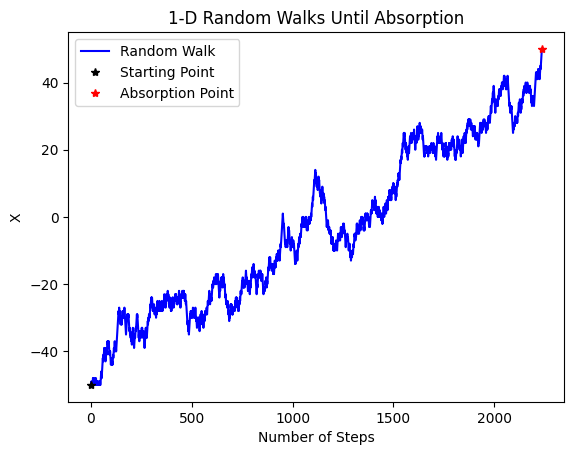

In [51]:

def random_walk_1d(x, BOUNDARY, plot=True, verbose=True):
  
    x_position = np.array([x])
    step = np.array([-1, 1])

    while x != BOUNDARY:  # Set a while loop so that it breaks once the absorption point is reached.
        step_choice = np.random.choice(step, p=[0.5, 0.5])
        x += step_choice

        # Ensure x stays within the range [-50, 50]
        if x < -BOUNDARY:
            x = -BOUNDARY
        elif x > BOUNDARY:
            x = BOUNDARY

        x_position = np.append(x_position, x)  # Append the new value of x to the array.

    # Print results
    if verbose:
        print(f'The starting point is {x_position[0]}')
        print(f'The Absorption point is {x_position[-1]}')
        print(f'Number of steps taken: {len(x_position)}')
        print(f'The minimum value is {min(x_position)}')
        print(f'The maximum value is {max(x_position)}')

    # Plot the random walk
    if plot:
        steps = range(len(x_position))  # Creates an axis for the number of steps in the plot below.
        start = x_position[:1]
        stop = x_position[-1:]
        plt.plot(steps, x_position, 'b')
        plt.title("1-D Random Walks Until Absorption")
        plt.xlabel('Number of Steps')
        plt.ylabel('X')
        plt.plot(steps[:1], start, 'k*')  # Starting point
        plt.plot(steps[-1:], stop, 'r*')  # Absorption point
        plt.legend(['Random Walk', 'Starting Point', 'Absorption Point'])
        plt.show()

    return x_position, len(x_position) 

x_position, steps_taken = random_walk_1d(x = -50, BOUNDARY = 50, plot=True, verbose=True) # Return the array of x positions and the number of steps taken

## Part 2. Simulate a 2-D random walk until absorption.

In [96]:
def random_walk_2d(x, y, BOUNDARY, abs_low, abs_up, plot=True, verbose=True):
    """Function to simulate a 2D random walk until absorption."""

    x_position = np.array([x])
    y_position = np.array([y])
    rng = np.random.default_rng()  # Create a random number generator

    while x != BOUNDARY or y not in range(abs_low,abs_up + 1):
        direction = rng.integers(4)  # Randomly choose a direction (0: up, 1: down, 2: left, 3: right)

        if direction == 0 and x < BOUNDARY:
            x += 1
        elif direction == 1 and y < BOUNDARY:
            y += 1
        elif direction == 2 and x > -BOUNDARY:
            x -= 1
        elif direction == 3 and y > -BOUNDARY:
            y -= 1

        x_position = np.append(x_position, x)  # Append the new value of x to the array.
        y_position = np.append(y_position, y)  # Append the new value of y to the array.   


    # Print summary statistics
    if verbose:
        print(f'\nThe Absorption point is (X, Y) = ({x_position[-1]}, {y_position[-1]})')
        print(f'Number of steps taken: {len(x_position)}')
        print(f'Min X: {x_position.min()}, Min Y: {y_position.min()}')
        print(f'Max X: {x_position.max()}, Max Y: {y_position.max()}')

    # Plot the random walk
    if plot:
        plt.plot(x_position, y_position, 'b', label="Random Walk")
        plt.title("2-D Random Walk Until Absorption")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.plot(x_position[0], y_position[0], 'k*', label="Starting Point")  # Starting point
        plt.plot(x_position[-1], y_position[-1], 'r*', label="Absorption Point")  # Absorption point
        plt.legend(['Random Walk', 'Starting Point', 'Absorption Point'])
        plt.show() 

    return x_position, y_position, len(x_position)  # Return the array of x positions and the number of steps taken



The Absorption point is (X, Y) = (50, 0)
Number of steps taken: 17808
Min X: -50, Min Y: -50
Max X: 50, Max Y: 34


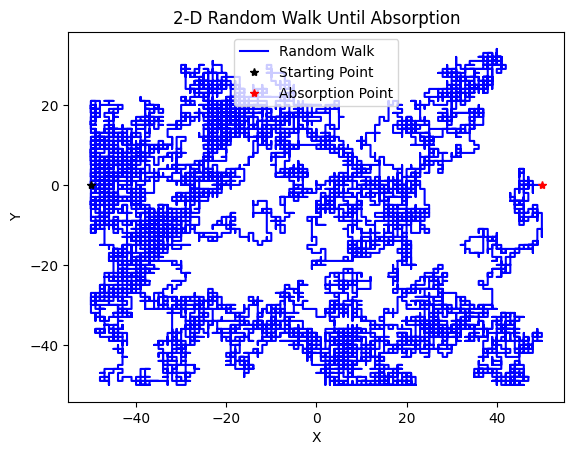

In [98]:
x_position, y_position, steps_taken = random_walk_2d(x = -50, y = 0, BOUNDARY = 50, abs_low=0, abs_up=0, plot=True, verbose=True) # Return the array of x positions and the number of steps taken

## Part 3. Simulate many random walks and get some statistics.

In [94]:
def statistics(N, x_start, y_start, BOUNDARY, abs_low, abs_up, verbose=True, plot=True):
    """Function to calculate the statistics of several random walks."""

    runs = np.array([])  # Initialize an empty array to store the runs.

    for i in range(N):

        x_position, y_position, steps_taken = random_walk_2d(x = x_start, y = y_start, BOUNDARY = BOUNDARY, abs_low=abs_low, abs_up=abs_up, plot=False, verbose=False) # Return the array of x positions and the number of steps taken         
        step_numbers = len(x_position)  # Number of steps taken in the random walk.
        runs = np.append(runs, step_numbers)  # Append the number of steps to the statistics array.
    
    if verbose:
        mean = np.mean(runs)  # Calculate the mean of the runs.
        median = np.median(runs)  # Calculate the median of the runs.
        mode_result = mode(runs)  # Calculate the mode of the runs.
        std = np.std(runs)  # Calculate the standard deviation of the runs.
        var = np.var(runs)  # Calculate the variance of the runs.
        min_run = runs.min()  # Calculate the minimum run.
        max_run = runs.max()  # Calculate the maximum run.

        # Print statistics
        print(f'''
        Mean: {mean}
        Median: {median}
        Mode: {mode_result[0]}
        Standard Deviation: {std}
        Variance: {var}
        Maximum: {max_run}
        Minimum: {min_run}
        Range: {max_run - min_run}
        ''')
    if plot:
        plt.hist(runs, color = 'blue')
        plt.title('Histogram of Residence Times')
        plt.xlabel('Residence Times')
        plt.ylabel('Number of Occurences')
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
        plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
        plt.legend(['Residence Times', "Mean", "Median"])
        plt.show()
    
    return runs  # Return the array of runs.
    


        Mean: 57375.52
        Median: 45853.5
        Mode: 3724.0
        Standard Deviation: 48823.482475030396
        Variance: 2383732440.9896
        Maximum: 266675.0
        Minimum: 3724.0
        Range: 262951.0
        


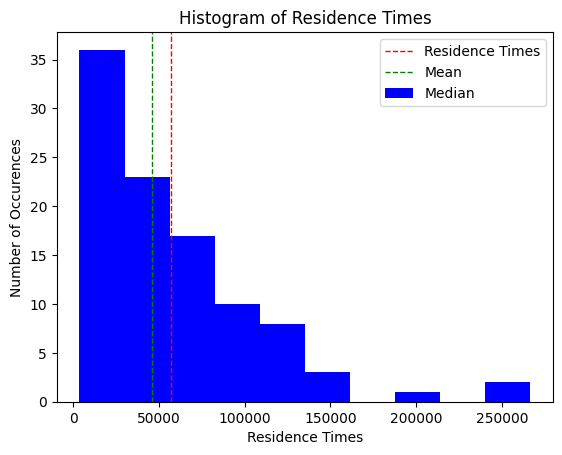

array([ 26107.,  11101.,   6782.,  34999.,  26975.,  44071.,  51138.,
        73032.,  23802.,  83545.,  45789.,  11418., 123462.,  68250.,
        51166.,  35395., 193281.,  14070.,  31178.,  18752.,  35029.,
        41342.,  81125.,  26430.,  11835.,  22767., 266675.,  18089.,
        69353.,  83233., 124049.,  60429., 108401.,  46717., 113440.,
        62605.,  83386.,  67528., 115706.,  16500.,  21622.,  58493.,
        43764.,  34302.,  86755.,  30653.,  49533.,  48339.,  50964.,
        61877.,  36424., 114286.,   6922.,  16558., 243949.,  75968.,
       118839.,  14731.,  20068.,  61522.,  15476.,  88267., 158966.,
        16977.,  15100., 138629.,   7071.,   6656., 104900.,  15704.,
        72809.,  18747.,  66313.,  39652., 117244.,  62040., 118611.,
        13051.,  37266.,  42334.,   9818.,   3724.,  72458.,  28819.,
       156374.,  89385.,  13922.,  25597.,  82516.,  24889.,  15435.,
        54743.,  23811.,  84482.,  45918., 108290.,  46822.,   7581.,
         5203.,  574

In [95]:
statistics(N=100, x_start=-50, y_start=0, BOUNDARY=50, abs_low=0, abs_up=1, verbose=True, plot=True)  # Call the function to calculate the statistics of several random walks.

In [ ]:
statistics(N=1000, x_start=-50, y_start=0, BOUNDARY=50, abs_low=0, abs_up=1, verbose=False, plot=False)  # Call the function to calculate the statistics of several random walks.

## Adjust the range to [-25, 25]

In [ ]:
x_position, y_position, steps_taken = random_walk_2d(x = -50, y = 0, BOUNDARY = 50, abs_low=-25, abs_up=25, plot=True, verbose=True) # Return the array of x positions and the number of steps taken

In [ ]:
statistics(N=100, x_start=-50, y_start=0, BOUNDARY=50, abs_low=-25, abs_up=25, verbose=True, plot=True)  # Call the function to calculate the statistics of several random walks.

In [ ]:
statistics(N=1000, x_start=-50, y_start=0, BOUNDARY=50, abs_low=-25, abs_up=25, verbose=True, plot=True)  # Call the function to calculate the statistics of several random walks.

## Part 3: Simulate a 3-D random walk until absorption